In [1]:
import pandas as pd
import allel
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_merge = pd.read_csv('../analysis_files/df_merged.csv')

In [3]:
df_merge.head()

,Unnamed: 0,tool,threshold,strain,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score
0,0,BioGraph*,10.0,AKR_J,36.0,389.0,206.0,504.0,468.0,0.071429,0.084706,0.346218,0.077503
1,1,BioGraph*,100.0,AKR_J,249.0,176.0,289.0,504.0,255.0,0.494048,0.585882,0.621505,0.536060
2,2,BioGraph*,1000.0,AKR_J,269.0,156.0,299.0,504.0,235.0,0.533730,0.632941,0.657143,0.579117
3,3,BioGraph*,10000.0,AKR_J,291.0,134.0,347.0,504.0,213.0,0.577381,0.684706,0.721414,0.626480
4,4,breakdancer,10.0,AKR_J,9.0,527.0,253.0,504.0,495.0,0.017857,0.016791,0.324359,0.017308


In [4]:
strain=['AKR_J','A_J','BALB_CJ','C3H_HeJ','CBA_J','DBA_2J','LP_J']

In [5]:
df_sum1 = pd.read_csv('../analysis_files/df_sum')

# S1

In [6]:
# df_sum1["Tool"] = df_sum1["tool"].map(dict(zip(fig_order, labels)))

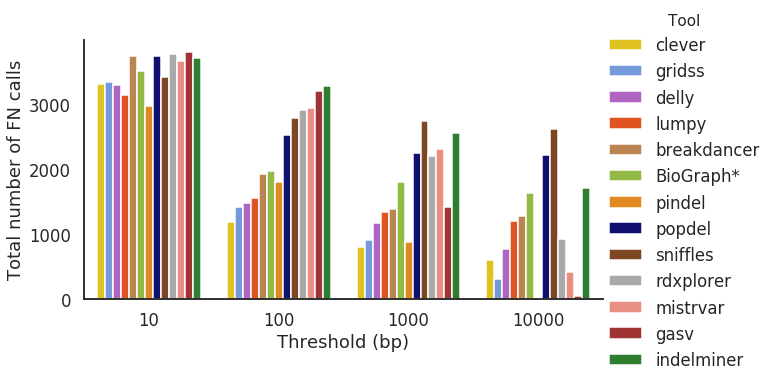

In [7]:
#tool order arranged based on 100 bp threshold (increasing)

%store -r
figs1a=sns.set_style("white")
figs1a=sns.set_context("talk")

fig_order=['clever','gridss','delly','smoove','breakdancer','BioGraph*','pindel','popdel','sniffles','rdxplorer','mistrvar','gasv','indelminer']
labels   =['clever','gridss','delly','lumpy','breakdancer','BioGraph*','pindel','popdel','sniffles','rdxplorer','mistrvar','gasv','indelminer']
df_sum1["Tool"] = df_sum1["tool"].map(dict(zip(fig_order, labels)))
pal = []
for tool in fig_order:
    pal.append(color_map[tool])

figs1a = sns.catplot(x="threshold", y="nFN", kind="bar",data = df_sum1,hue="Tool",aspect=1.8, palette=pal,hue_order=labels)
figs1a.set(xlabel='Threshold (bp)', ylabel='Total number of FN calls')
figs1a=sns.despine()
plt.xticks(rotation=0)
#plt.show(figs1a)
plt.savefig("../figures/supplementary/mouse/bar/FN.png")
plt.savefig("../figures/supplementary/mouse/bar/FN.pdf", bbox_inches='tight')

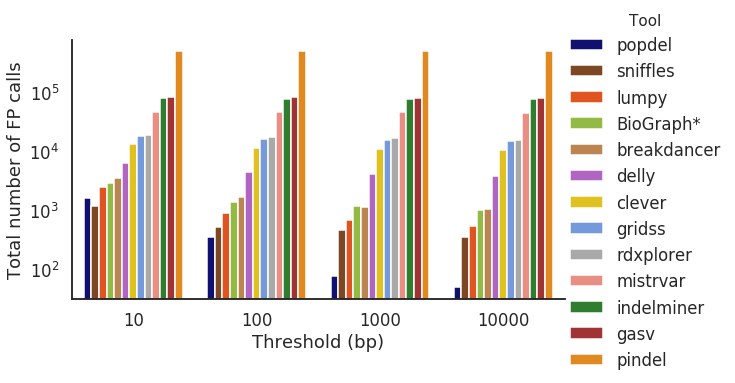

In [8]:
figs1b=sns.set_style("white")
figs1b=sns.set_context("talk")

fig_order = ['popdel','sniffles','smoove','BioGraph*','breakdancer','delly','clever','gridss','rdxplorer','mistrvar','indelminer','gasv','pindel']
labels =    ['popdel','sniffles','lumpy','BioGraph*','breakdancer','delly','clever','gridss','rdxplorer','mistrvar','indelminer','gasv','pindel']
pal = []
for tool in fig_order:
    pal.append(color_map[tool])

figs1b = sns.catplot(x="threshold", y="nFP", kind="bar",data = df_sum1,hue='Tool',aspect=1.8, palette=pal,hue_order=labels)
figs1b.set(xlabel='Threshold (bp)', ylabel='Total number of FP calls')
figs1b.set(yscale="log");
figs1b=sns.despine()
#plt.show(figs1b)
plt.savefig("../figures/supplementary/mouse/bar/FP.png")
plt.savefig("../figures/supplementary/mouse/bar/FP.pdf", bbox_inches='tight')

# S2 - F-score

/home/vs/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


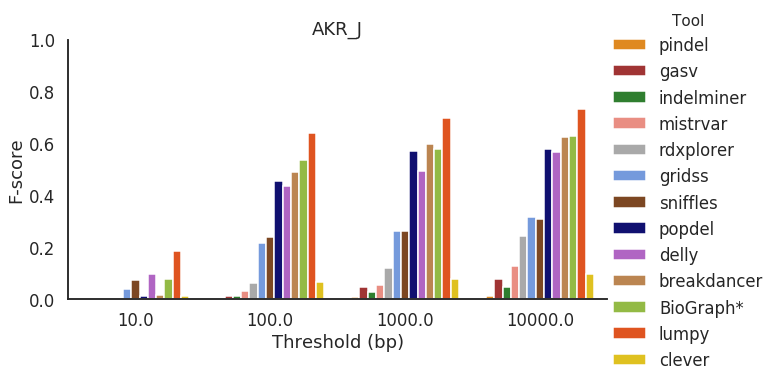

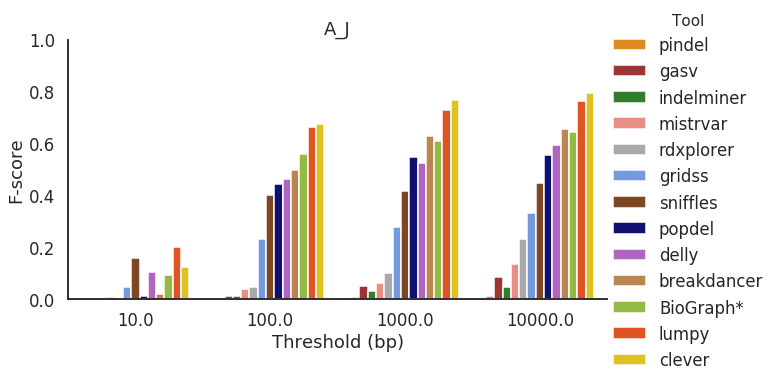

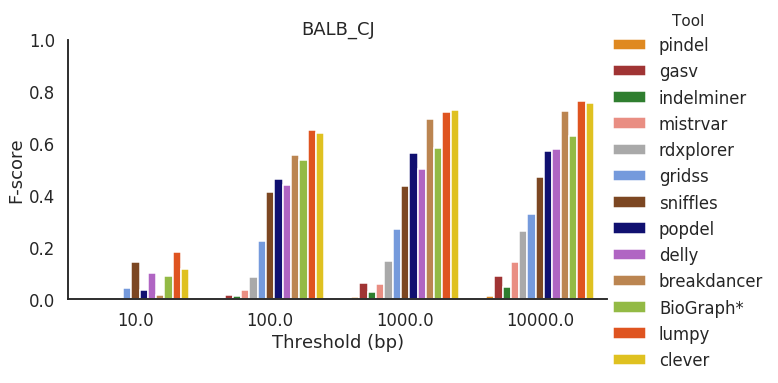

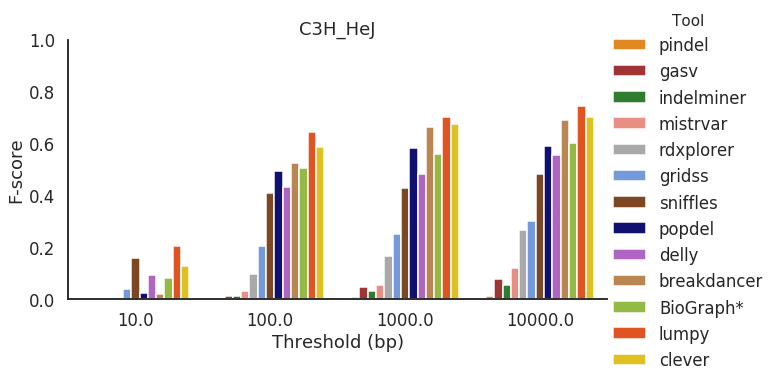

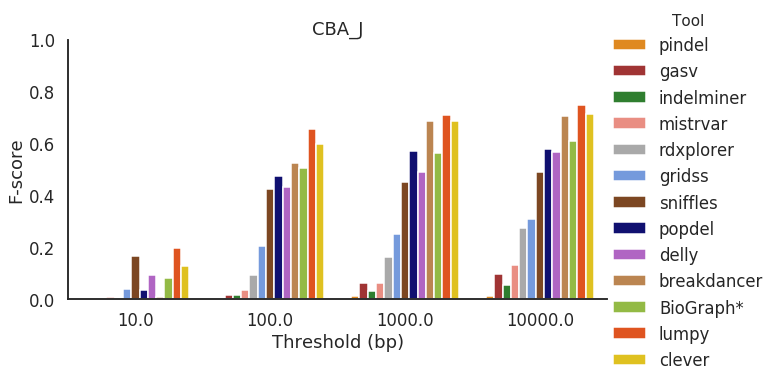

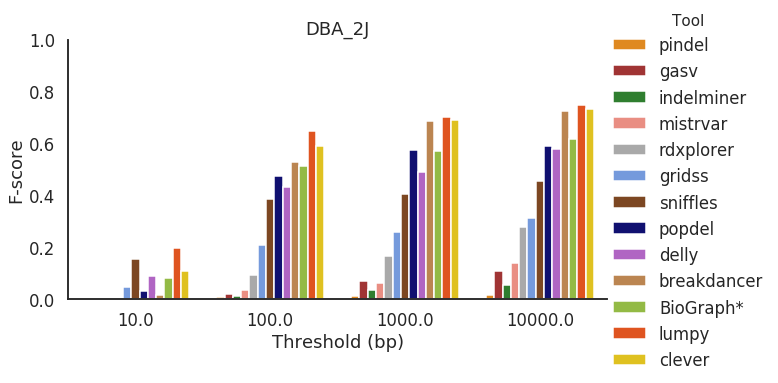

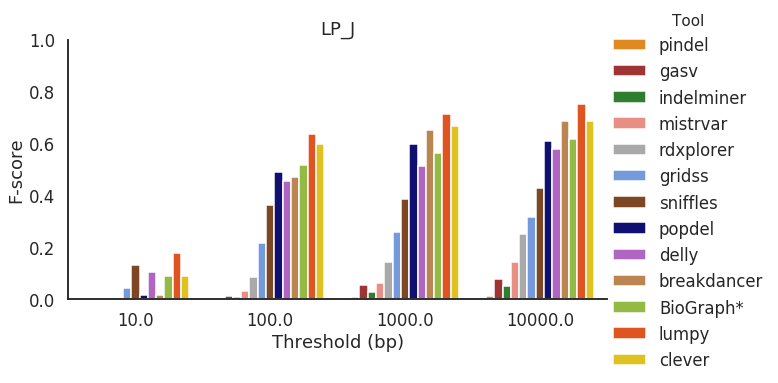

In [9]:
for s in strain:
    fig=sns.set_style("white")
    fig=sns.set_context("talk")
    
    fig_order = ['pindel','gasv','indelminer','mistrvar','rdxplorer','gridss','sniffles','popdel','delly','breakdancer','BioGraph*','smoove','clever']
    labels   = ['pindel','gasv','indelminer','mistrvar','rdxplorer','gridss','sniffles','popdel','delly','breakdancer','BioGraph*','lumpy','clever']
    df_merge["Tool"] = df_merge["tool"].map(dict(zip(fig_order, labels)))
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
    
    fig = sns.catplot(x="threshold", y="f-score", kind="bar",data = df_merge.loc[df_merge['strain'] == s],hue='Tool',aspect=1.8,palette=pal,hue_order=labels)
    plt.ylim(0, 1)
    plt.title(s)
    fig.set(xlabel='Threshold (bp)', ylabel='F-score')
    g=sns.despine()
    #plt.show(fig)
    plt.savefig("../figures/supplementary/mouse/bar/F-score_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/F-score_"+s+".pdf", bbox_inches='tight')

# S3 - Precision

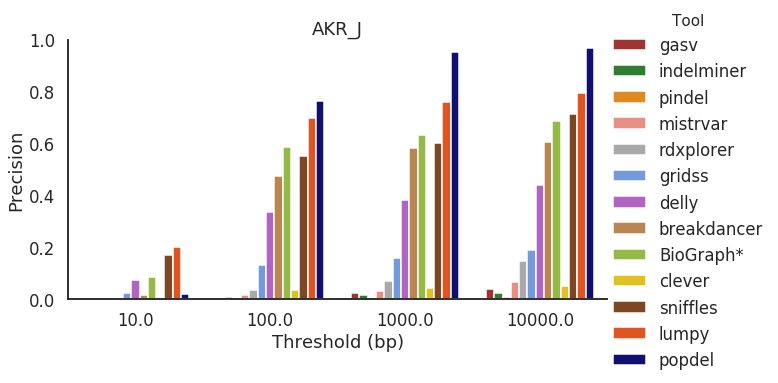

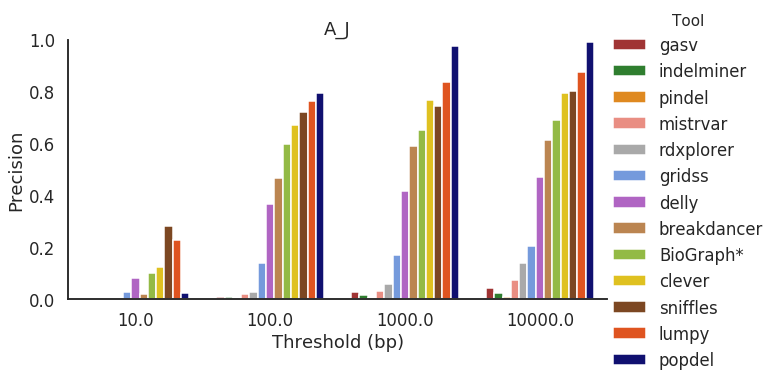

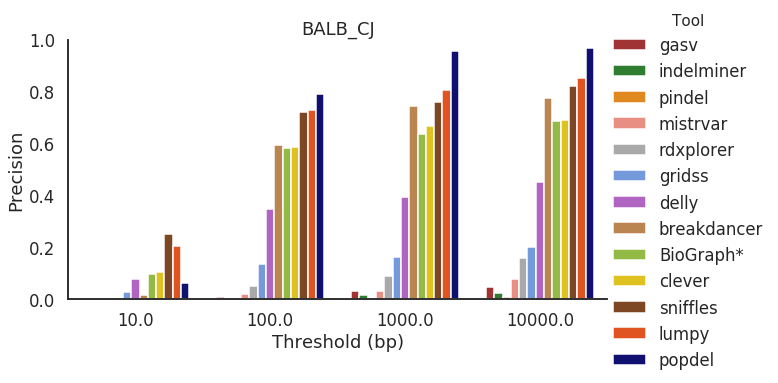

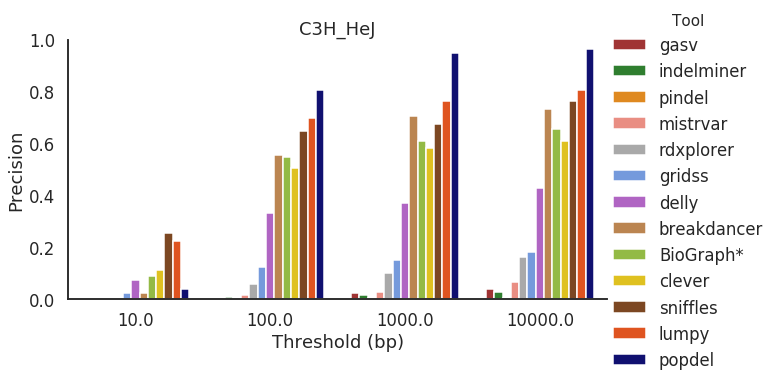

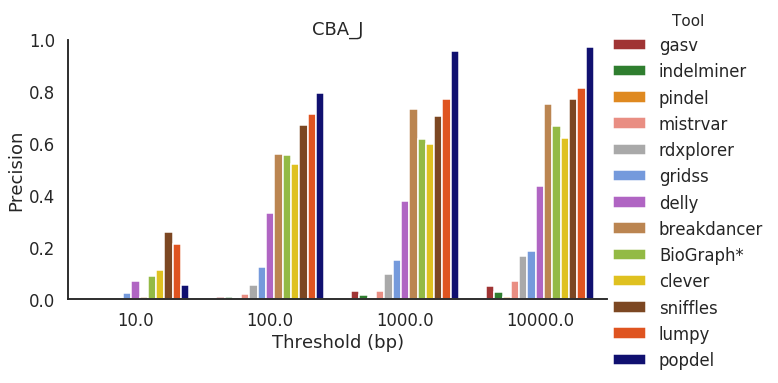

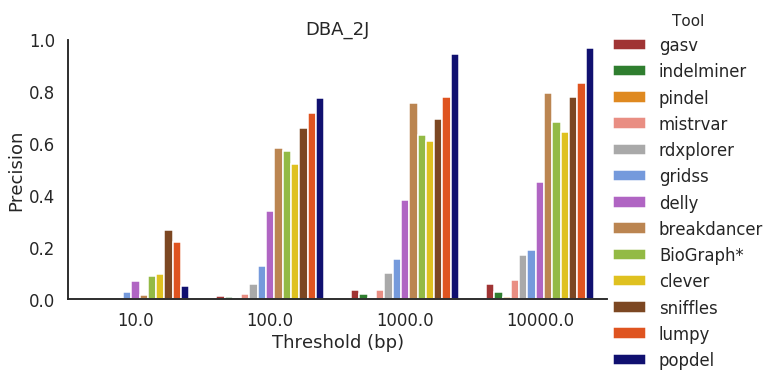

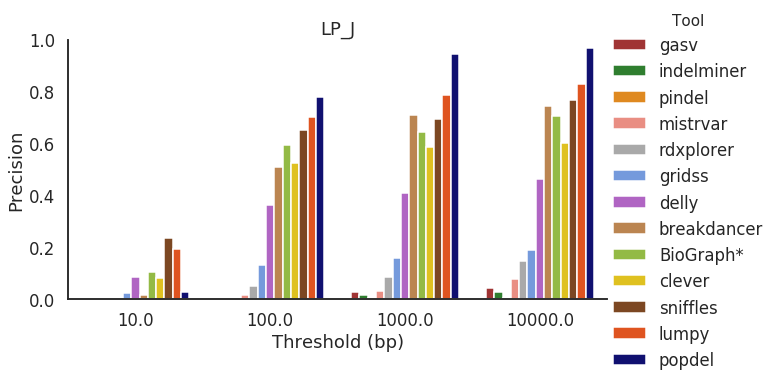

In [28]:
for s in strain:
    fig=sns.set_style("white")
    fig=sns.set_context("talk")
    
    fig_order = ['gasv','indelminer','pindel','mistrvar','rdxplorer','gridss','delly','breakdancer','BioGraph*','clever','sniffles','smoove','popdel']
    fig_order1 = ['gasv','indelminer','pindel','mistrvar','rdxplorer','gridss','delly','breakdancer','BioGraph*','clever','sniffles','lumpy','popdel']
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
        
    fig = sns.catplot(x="threshold", y="precision", kind="bar",data = df_merge.loc[df_merge['strain'] == s],hue='Tool',aspect=1.8,palette=pal,hue_order=fig_order1)
    plt.ylim(0, 1)
    plt.title(s)
    fig.set(xlabel='Threshold (bp)', ylabel='Precision')
    g=sns.despine()
    #plt.show(fig)
    plt.savefig("../figures/supplementary/mouse/bar/precision_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/precision_"+s+".pdf", bbox_inches='tight')

# S4 - Sensitivity

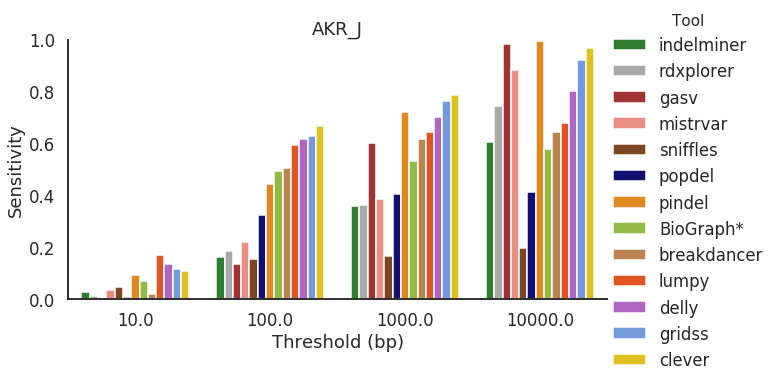

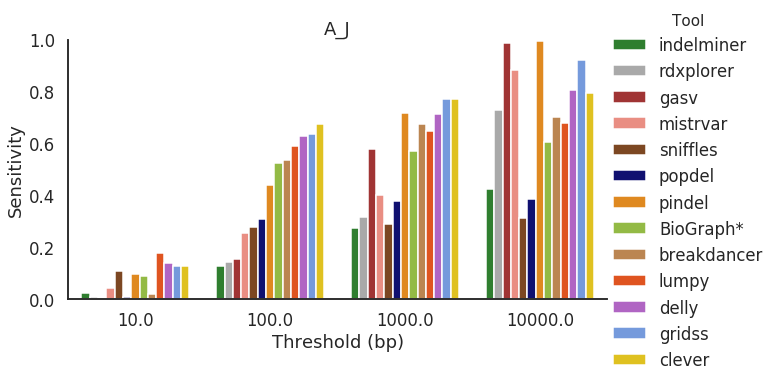

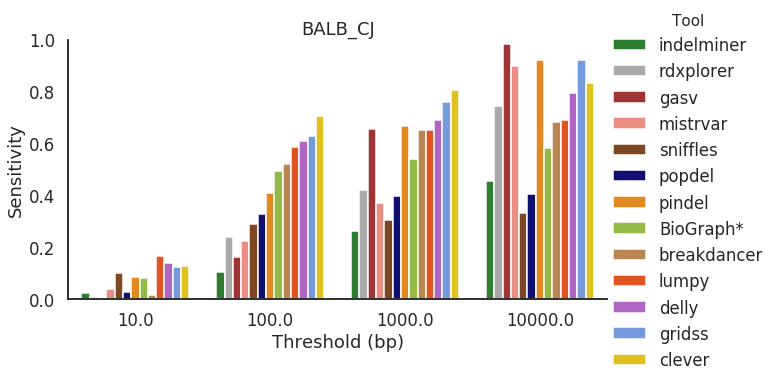

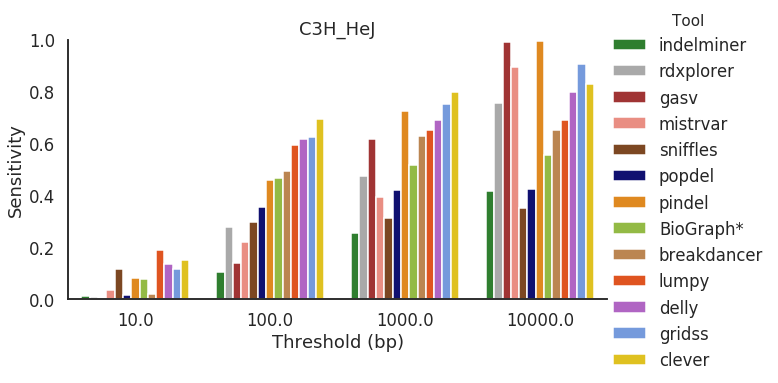

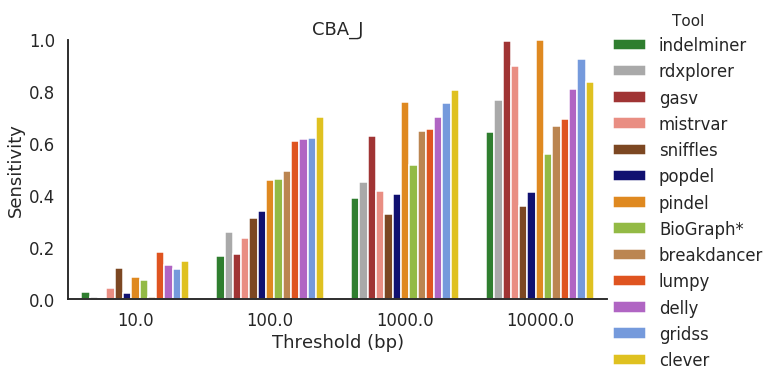

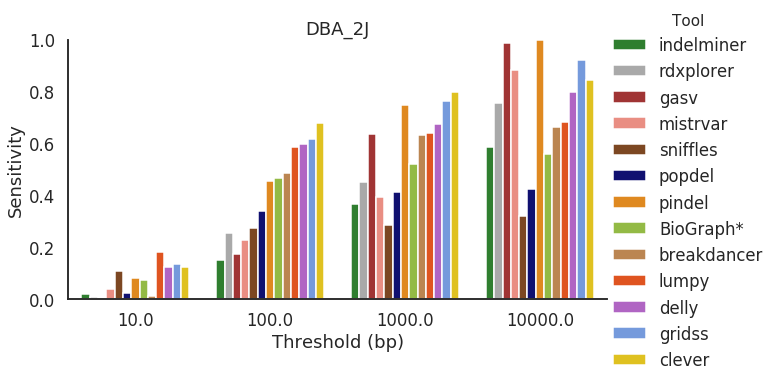

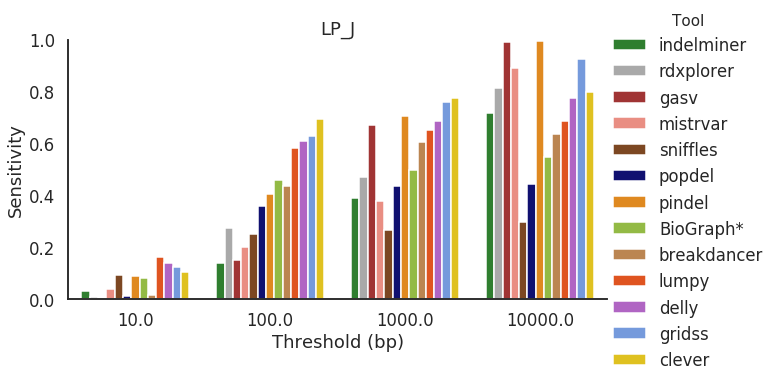

In [29]:
for s in strain:
    fig=sns.set_style("white")
    fig=sns.set_context("talk")
    
    fig_order = ['indelminer','rdxplorer','gasv','mistrvar','sniffles','popdel','pindel','BioGraph*','breakdancer','smoove','delly','gridss','clever']
    fig_order1 = ['indelminer','rdxplorer','gasv','mistrvar','sniffles','popdel','pindel','BioGraph*','breakdancer','lumpy','delly','gridss','clever']
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
    
    fig = sns.catplot(x="threshold", y="sensitivity", kind="bar",data = df_merge.loc[df_merge['strain'] == s],hue='Tool',aspect=1.8,palette=pal, hue_order=fig_order1)
    plt.ylim(0, 1)
    plt.title(s)
    fig.set(xlabel='Threshold (bp)', ylabel='Sensitivity')
    g=sns.despine()
    #plt.show(fig)
    plt.savefig("../figures/supplementary/mouse/bar/sensitivity_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/sensitivity"+s+".pdf", bbox_inches='tight')

# S5 - Specificity

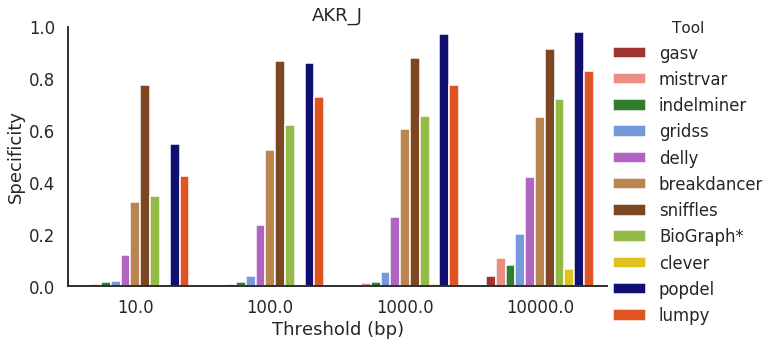

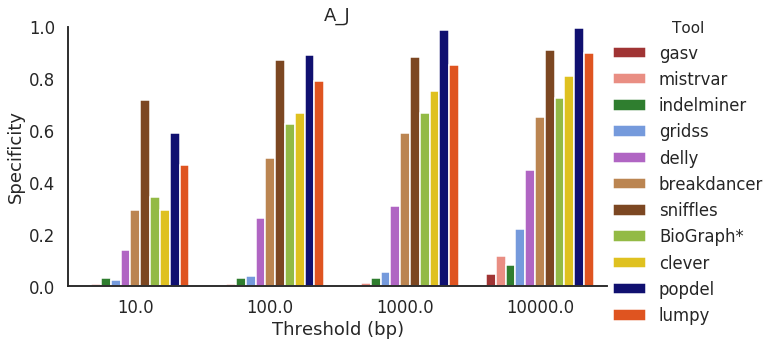

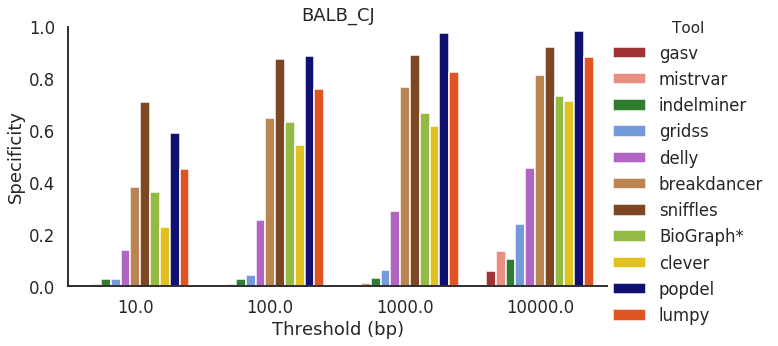

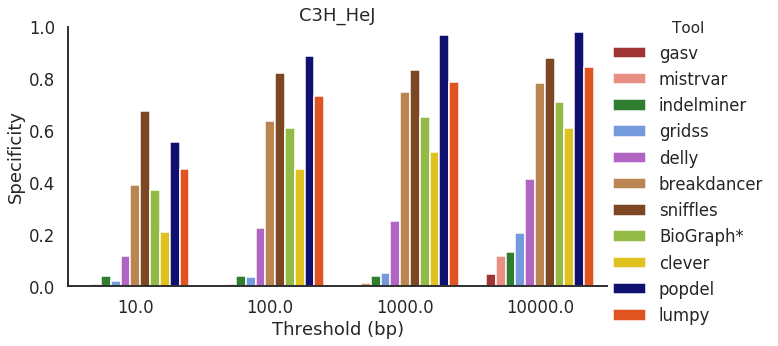

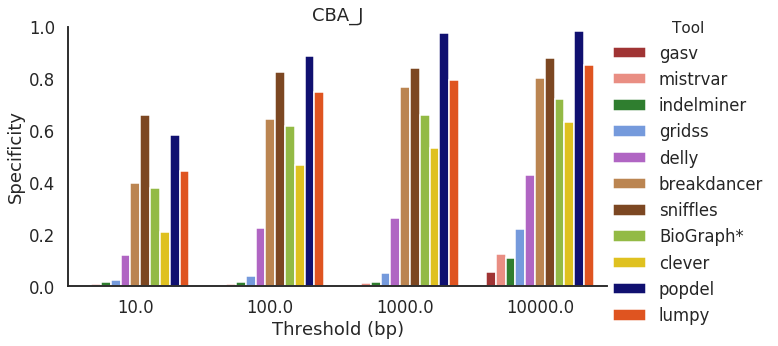

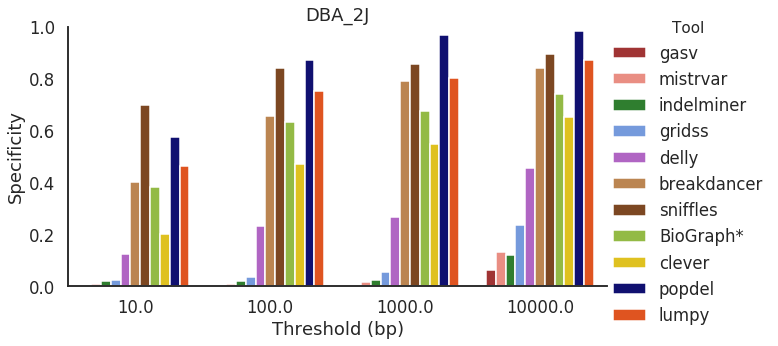

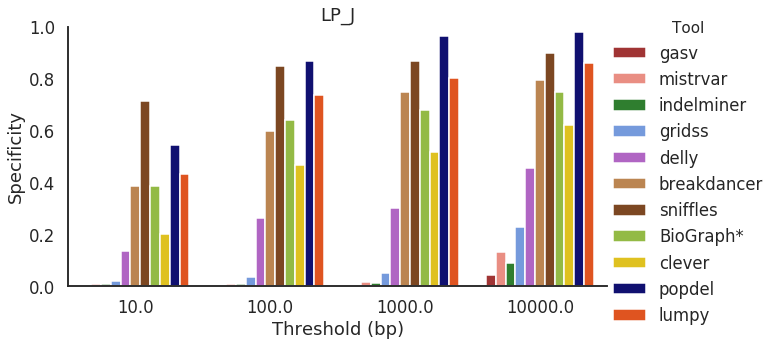

In [30]:
for s in strain:
    fig=sns.set_style("white")
    fig=sns.set_context("talk")
    
    fig_order = ['gasv','mistrvar','indelminer','gridss','delly','breakdancer','sniffles','BioGraph*','clever','popdel','smoove']
    fig_order1 = ['gasv','mistrvar','indelminer','gridss','delly','breakdancer','sniffles','BioGraph*','clever','popdel','lumpy']
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
    
    fig = sns.catplot(x="threshold", y="specificity", kind="bar",data = df_merge.loc[df_merge['strain'] == s],hue='Tool',aspect=1.8,palette=pal,hue_order=fig_order1)
    plt.title(s)
    plt.ylim(0, 1)
    fig.set(xlabel='Threshold (bp)', ylabel='Specificity')
    fig=sns.despine()
    #plt.show(fig)
    plt.savefig("../figures/supplementary/mouse/bar/specificity_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/specificity_"+s+".pdf", bbox_inches='tight')
    

# S6 Sensitivity x Precision

In [15]:
df_mean=df_merge.groupby(['tool','threshold'],as_index=False).mean()
df_mean.head()

,tool,threshold,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score
0,BioGraph*,10.0,42.923077,412.846154,241.384615,545.692308,502.769231,0.078808,0.094471,0.368844,0.085901
1,BioGraph*,100.0,261.923077,193.846154,323.769231,545.692308,283.769231,0.480231,0.575378,0.625969,0.523341
2,BioGraph*,1000.0,287.615385,168.153846,335.615385,545.692308,258.076923,0.527023,0.631422,0.666503,0.574327
3,BioGraph*,10000.0,310.384615,145.384615,391.307692,545.692308,235.307692,0.568842,0.681724,0.729466,0.619981
4,breakdancer,10.0,8.230769,495.461538,292.230769,545.692308,537.461538,0.015247,0.016396,0.371803,0.015748


In [22]:
color_map1 = {'BioGraph*':'yellowgreen', 'breakdancer':'peru', 'clever':'gold', 'delly':'darkorange', 'delly':'mediumorchid', 
             'gasv':'firebrick', 'gridss':'cornflowerblue', 'indelminer':'forestgreen', 'lumpexpress':'pink', 
             'mistrvar':'salmon', 'pindel':'darkorange', 'popdel':'navy', 'rdxplorer':'darkgray', 
             'lumpy':'orangered', 'sniffles':'saddlebrown', 'true deletions':'black'}

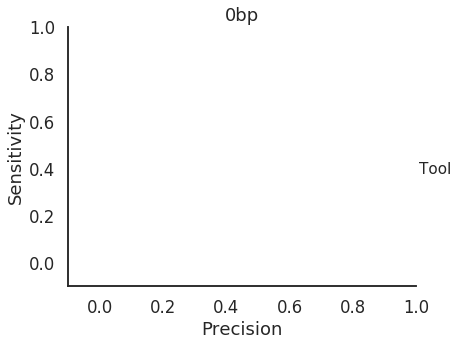

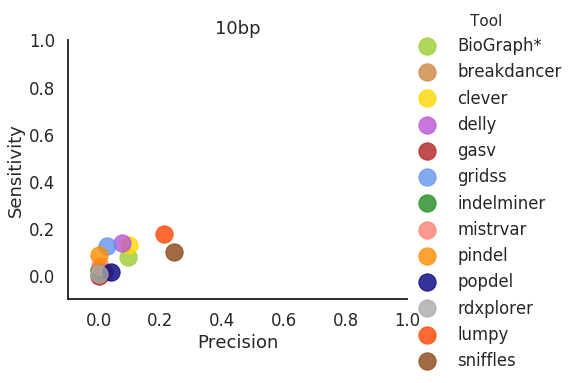

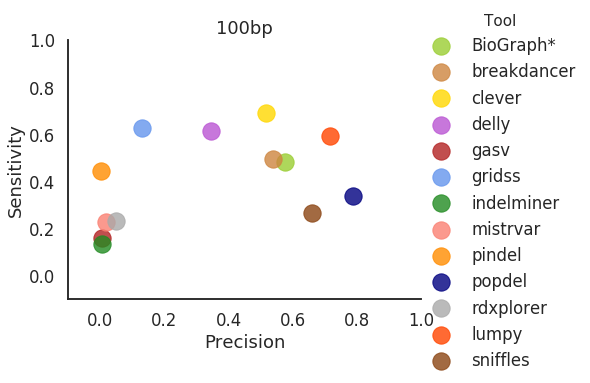

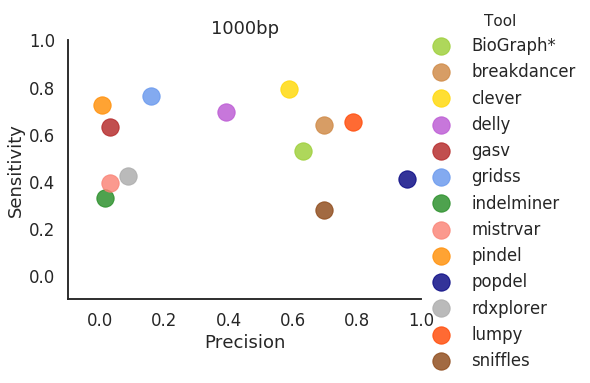

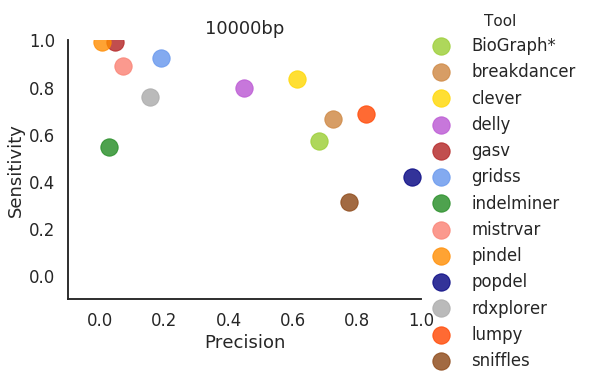

In [31]:
for th in [0,10,100,1000,10000]:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    fig_order = ["indelminer","gasv","mistrvar","rdxplorer","sniffles","popdel","pindel","BioGraph*","breakdancer","smoove","delly","gridss","clever"]
    labels    = ["indelminer","gasv","mistrvar","rdxplorer","sniffles","popdel","pindel","BioGraph*","breakdancer","lumpy","delly","gridss","clever"]

    df_mean["Tool"] = df_mean["tool"].map(dict(zip(fig_order, labels)))
    
    g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == th], x='precision', y='sensitivity', hue='Tool',fit_reg=False,aspect=1.3,scatter_kws={"s": 300},palette=color_map1)
    g.set(xlabel='Precision', ylabel='Sensitivity')
    plt.title(str(th)+"bp")
    g=plt.xlim(-0.1, 1)
    g=plt.ylim(-0.1, 1)
    g=sns.despine()
    plt.savefig("../figures/supplementary/mouse/dot/Precision_vs_Sensitivity"+str(th)+"t.png")
    plt.savefig("../figures/supplementary/mouse/dot/Precision_vs_Sensitivity"+str(th)+"t.pdf")

In [24]:
color_map1

{'BioGraph*': 'yellowgreen',
 'breakdancer': 'peru',
 'clever': 'gold',
 'delly': 'mediumorchid',
 'gasv': 'firebrick',
 'gridss': 'cornflowerblue',
 'indelminer': 'forestgreen',
 'lumpexpress': 'pink',
 'lumpy': 'orangered',
 'mistrvar': 'salmon',
 'pindel': 'darkorange',
 'popdel': 'navy',
 'rdxplorer': 'darkgray',
 'sniffles': 'saddlebrown',
 'true deletions': 'black'}

# S7 Sensitivity x Specificity

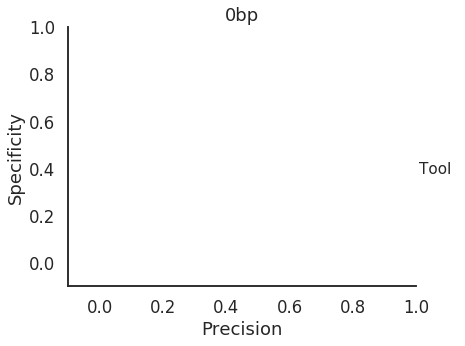

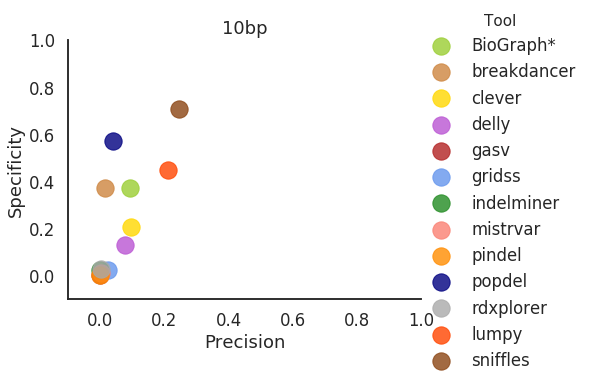

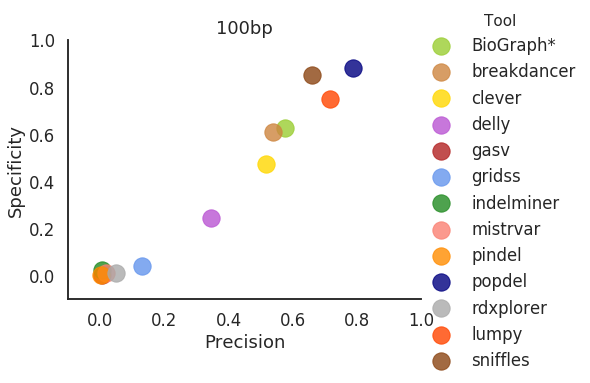

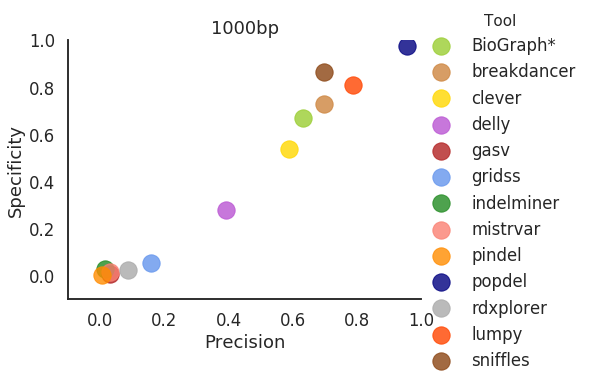

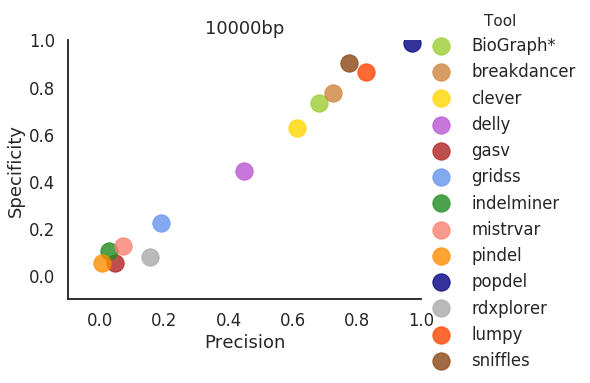

In [33]:
for th in [0,10,100,1000,10000]:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == th], x='precision', y='specificity', hue='Tool',fit_reg=False,aspect=1.3,scatter_kws={"s": 300},palette=color_map1)
    g.set(xlabel='Precision', ylabel='Specificity')
    plt.title(str(th)+"bp")
    g=plt.xlim(-0.1, 1)
    g=plt.ylim(-0.1, 1)
    g=sns.despine()
    plt.savefig("../figures/supplementary/mouse/dot/Precision_vs_specificity"+str(th)+"t.png")
    plt.savefig("../figures/supplementary/mouse/dot/Precision_vs_specificity"+str(th)+"t.pdf")


# S8 Specificity 100-500 bp Length Deletions

In [11]:
 df_50_100=pd.read_csv('../analysis_files/df_merged_50-100.csv')

In [12]:
df_50_100

,Unnamed: 0,tool,threshold,strain,len,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score
0,0,BioGraph*,10,A_J,50-100,2,136,0,37,35.0,0.054054,0.014493,0.0,0.022857
1,1,BioGraph*,10,A_J,50-100,2,136,0,37,35.0,0.054054,0.014493,0.0,0.022857
2,2,BioGraph*,10,A_J,50-100,2,136,0,37,35.0,0.054054,0.014493,0.0,0.022857
3,3,BioGraph*,10,A_J,50-100,2,136,0,37,35.0,0.054054,0.014493,0.0,0.022857
4,4,BioGraph*,10,A_J,50-100,2,136,0,37,35.0,0.054054,0.014493,0.0,0.022857
5,5,BioGraph*,10,A_J,50-100,2,136,0,37,35.0,0.054054,0.014493,0.0,0.022857
6,6,BioGraph*,10,A_J,50-100,2,136,0,37,35.0,0.054054,0.014493,0.0,0.022857
7,7,BioGraph*,10,A_J,50-100,2,136,0,37,35.0,0.054054,0.014493,0.0,0.022857
8,8,BioGraph*,10,A_J,50-100,2,136,0,37,35.0,0.054054,0.014493,0.0,0.022857
9,9,BioGraph*,10,A_J,50-100,2,136,0,37,35.0,0.054054,0.014493,0.0,0.022857


In [13]:
# df_sum=df_50_100.groupby(['tool','threshold'],as_index=False)['sensitivity','precision','specificity','f-score'].sum()

In [14]:
# df_sum

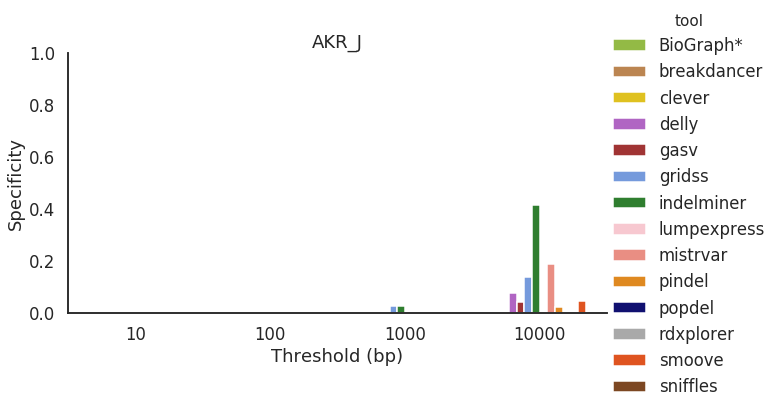

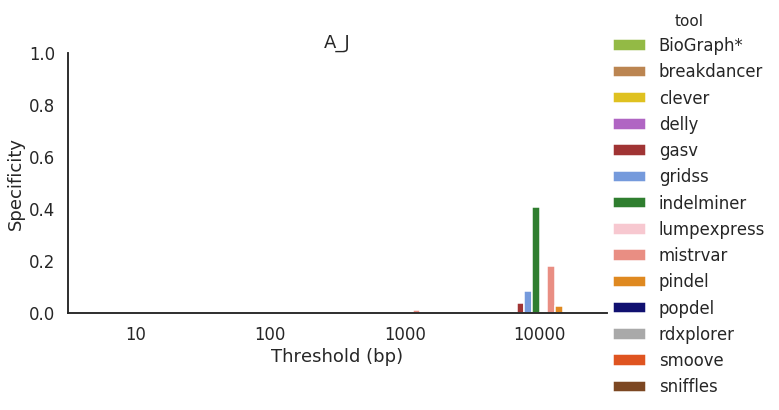

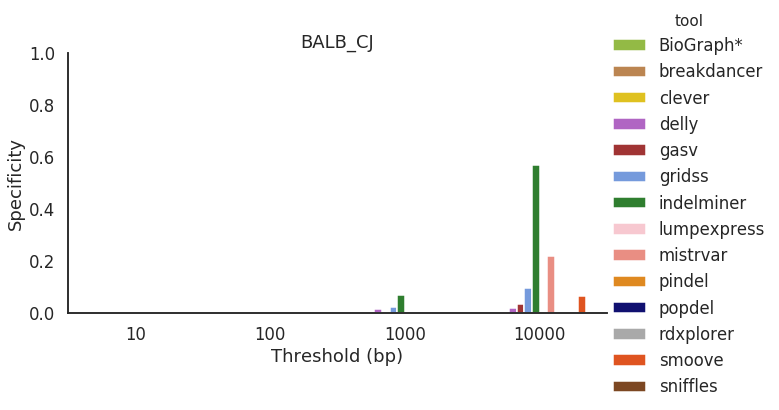

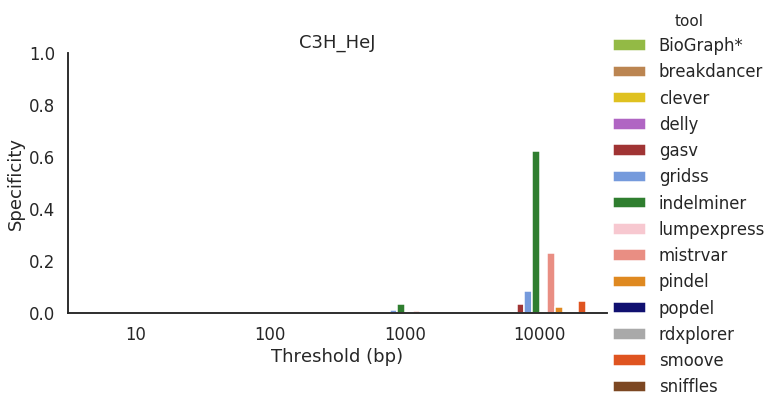

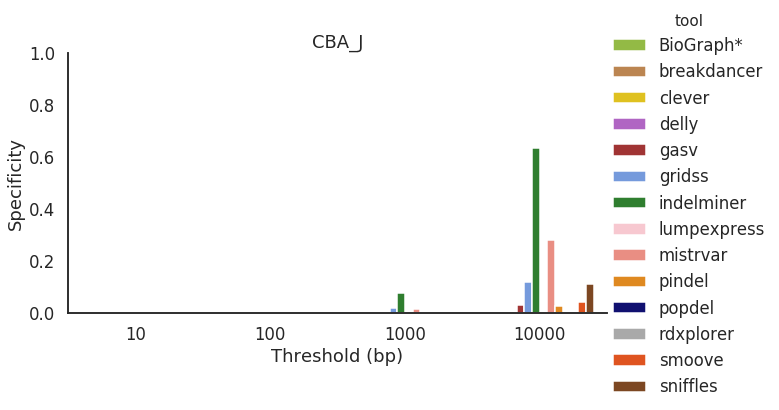

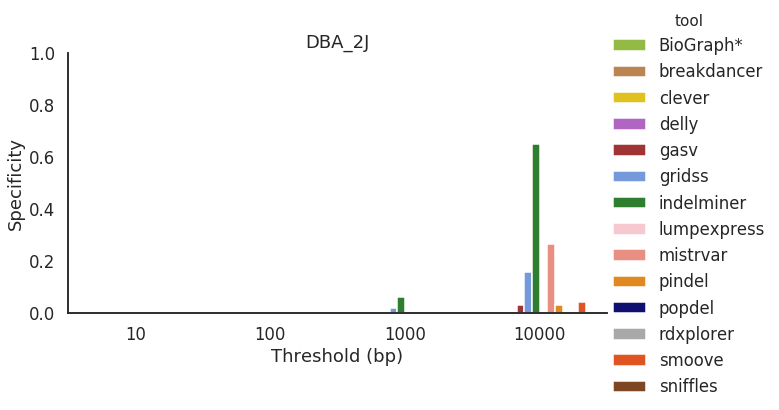

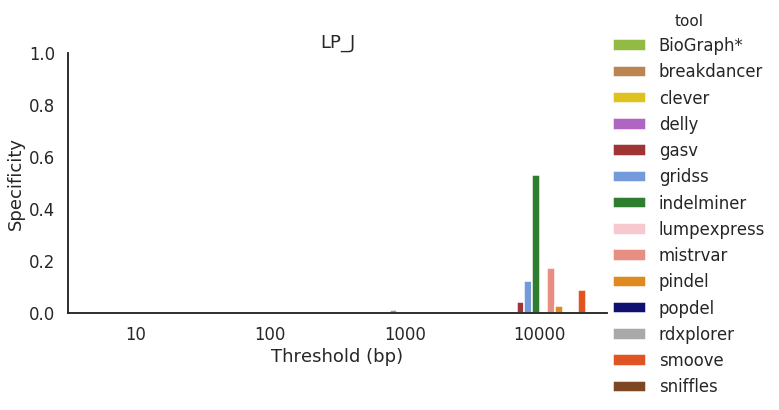

In [30]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','lumpexpress','mistrvar','pindel','popdel','rdxplorer','smoove','sniffles']
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
    
    data = df_50_100
    g = sns.catplot(x="threshold", y="specificity", kind="bar",data = df_50_100.loc[df_50_100['strain'] == s],ci=None,hue='tool',hue_order=fig_order,aspect=1.8,palette=pal)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='Specificity')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/specificity_th_50_100_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/specificity_th_50_100_"+s+".pdf")

In [17]:
 df_100_500=pd.read_csv('../analysis_files/df_merged_100-500.csv')

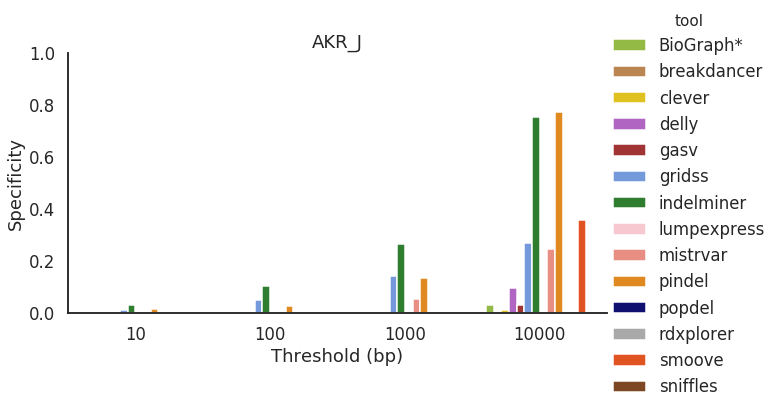

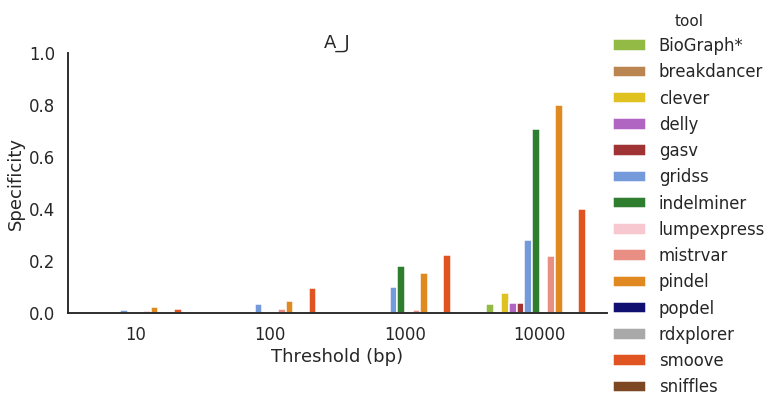

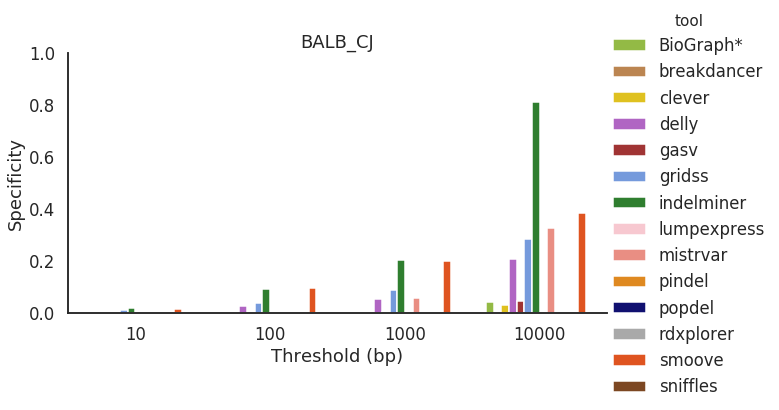

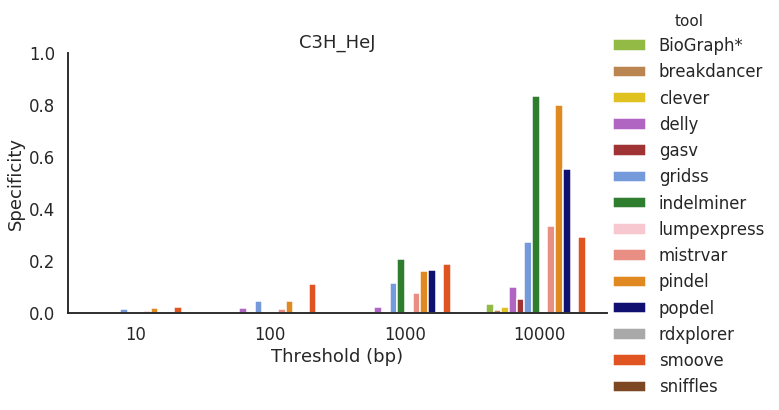

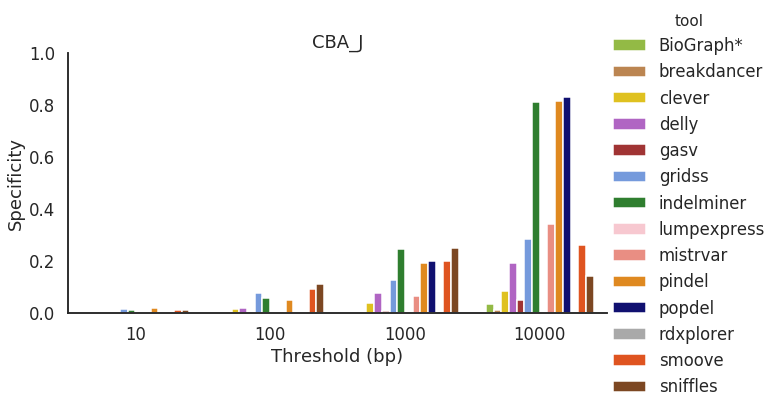

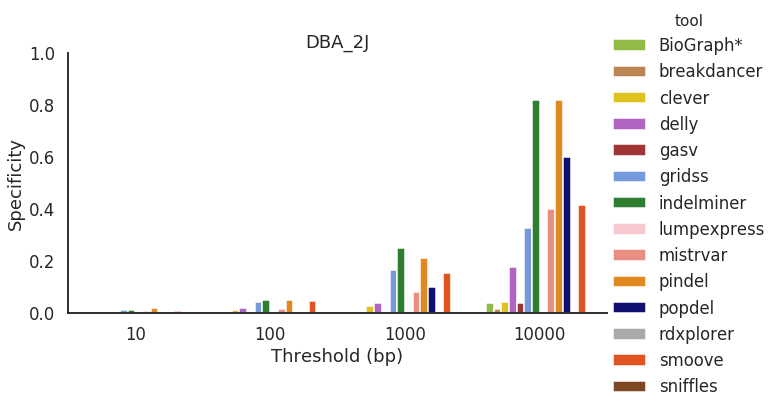

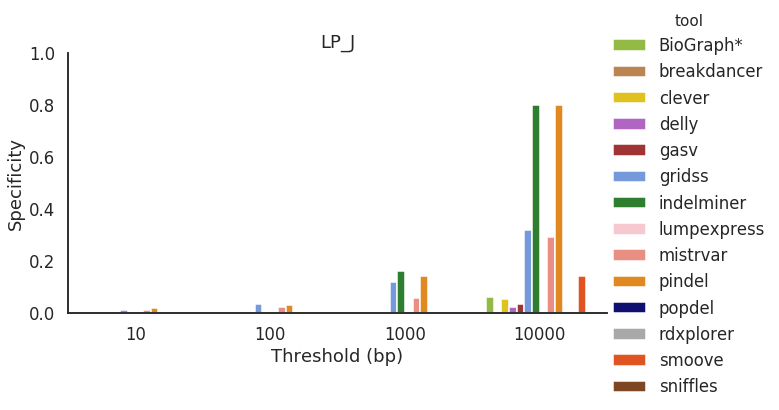

In [33]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','lumpexpress','mistrvar','pindel','popdel','rdxplorer','smoove','sniffles']
    pal = []
    
    data = df_100_500
    g = sns.catplot(x="threshold", y="specificity", kind="bar",data = df_100_500.loc[df_100_500['strain'] == s],ci=None,hue='tool',hue_order=fig_order,aspect=1.8,palette=color_map)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='Specificity')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/specificity_th_100_500_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/specificity_th_100_500_"+s+".pdf")

In [ ]:
# for s in strain:
#     g=sns.set_style("white")
#     g=sns.set_context("talk")
    
#     fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','lumpexpress','mistrvar','pindel','popdel','rdxplorer','smoove','sniffles']
#     pal = []
#     for tool in fig_order:
#         pal.append(color_map[tool])
    
#     data = df_merge_100_500
#     g = sns.catplot(x="threshold", y="specificity", kind="bar",data = df_merge_100_500,ci=None,hue='tool',hue_order=fig_order,aspect=1.8,palette=pal)

#     plt.title(s)
#     plt.ylim(0, 1)
#     g.set(xlabel='Threshold (bp)', ylabel='Specificity')
#     g=sns.despine()

#     #plt.show(g)
#     plt.savefig("../figures/supplementary/mouse/bar/specificity_th_100_500_"+s+".png")
#     plt.savefig("../figures/supplementary/mouse/bar/specificity_th_100_500_"+s+".pdf")

# S9 Specificity 500-1000 bp Length Deletions

In [20]:
 df_500_1000=pd.read_csv('../analysis_files/df_merged_500-1000.csv')

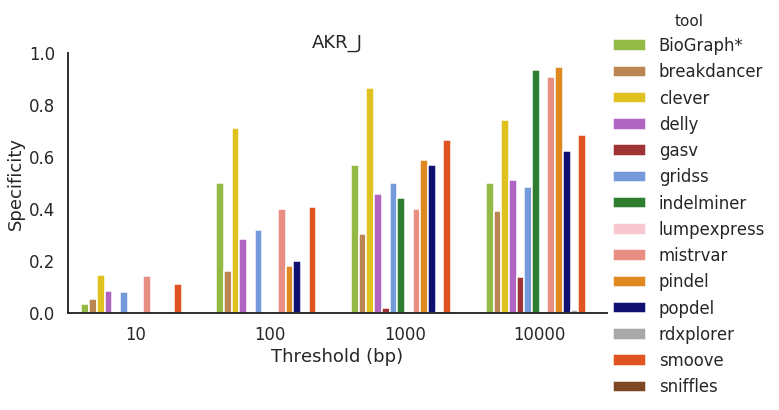

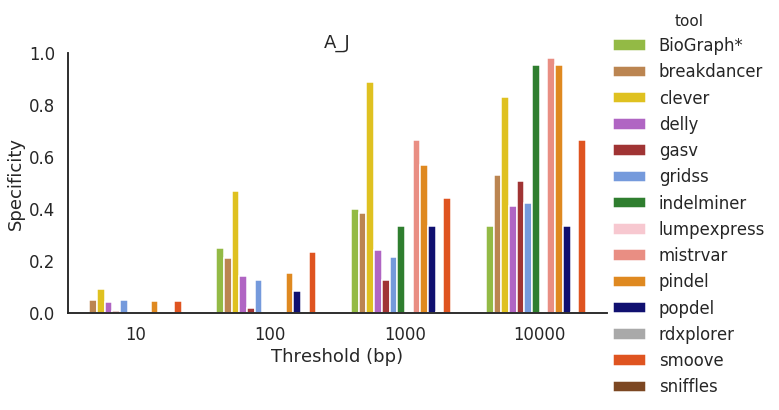

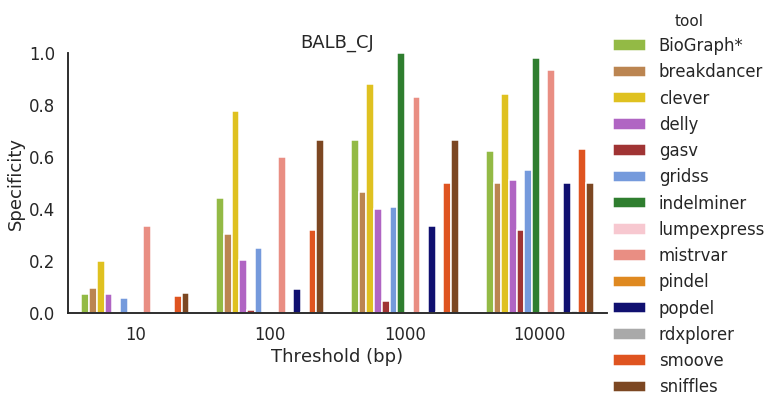

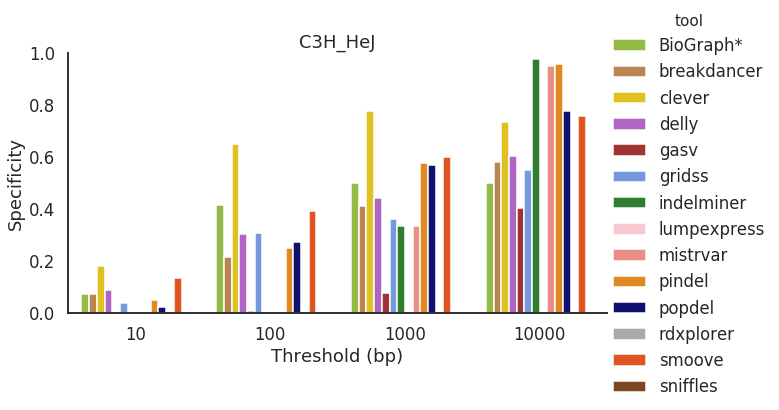

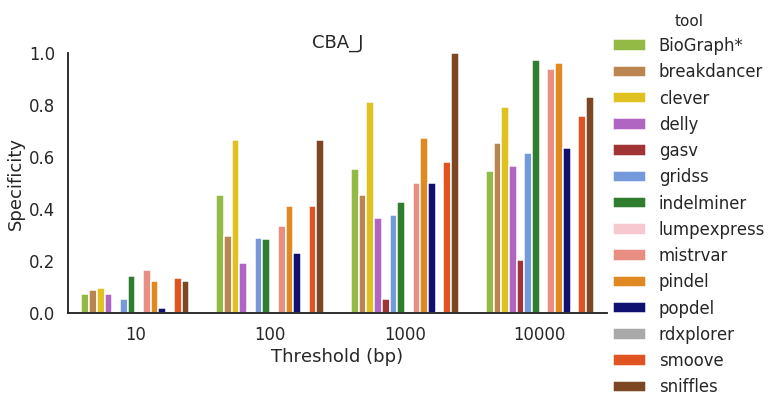

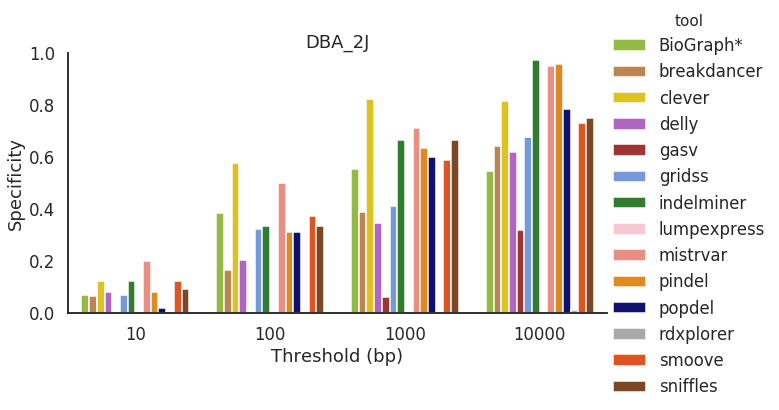

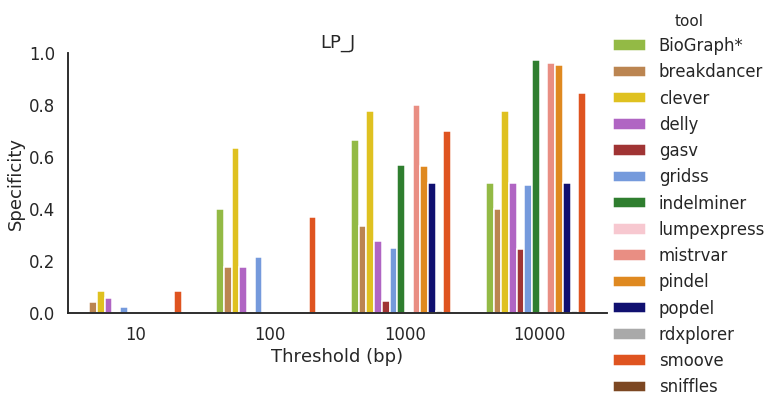

In [31]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','lumpexpress','mistrvar','pindel','popdel','rdxplorer','smoove','sniffles']
    pal = []
    g = sns.catplot(x="threshold", y="specificity", kind="bar",data = df_500_1000.loc[df_500_1000['strain'] == s],ci=None,hue='tool',hue_order=fig_order,aspect=1.8,palette=color_map)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='Specificity')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/specificity_th_500_1000_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/specificity_th_500_1000_"+s+".pdf")

# S10 Specificity 1000+ bp Length Deletions

In [23]:
 df_1000=pd.read_csv('../analysis_files/df_merged_1000+.csv')

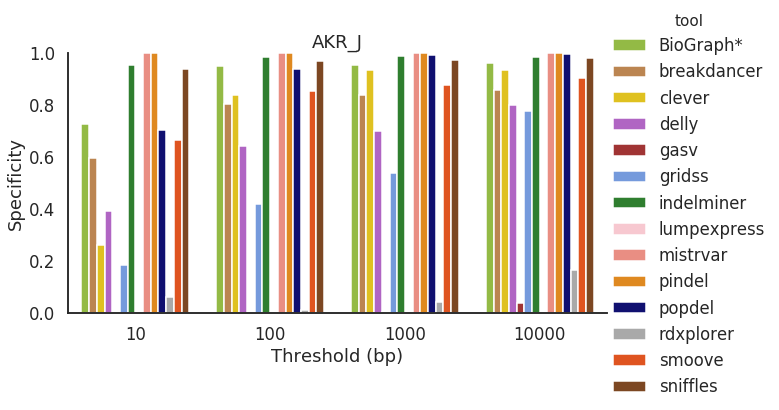

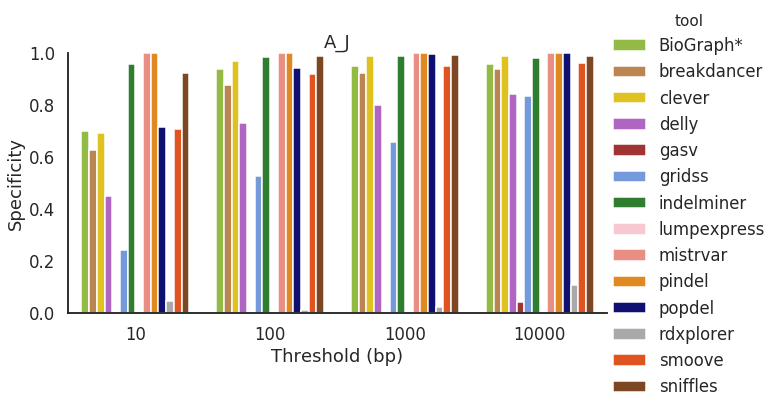

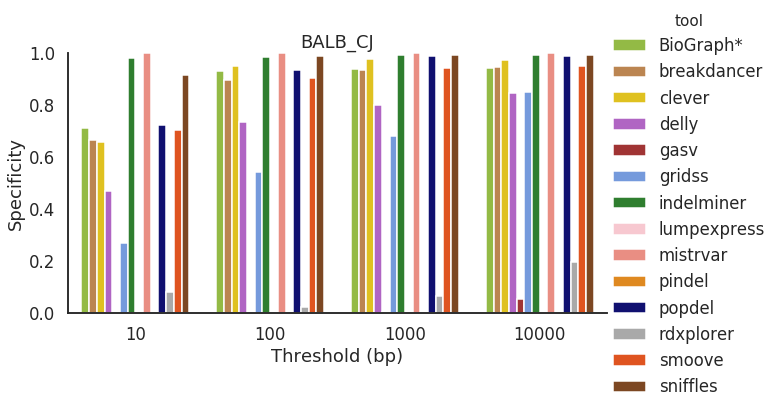

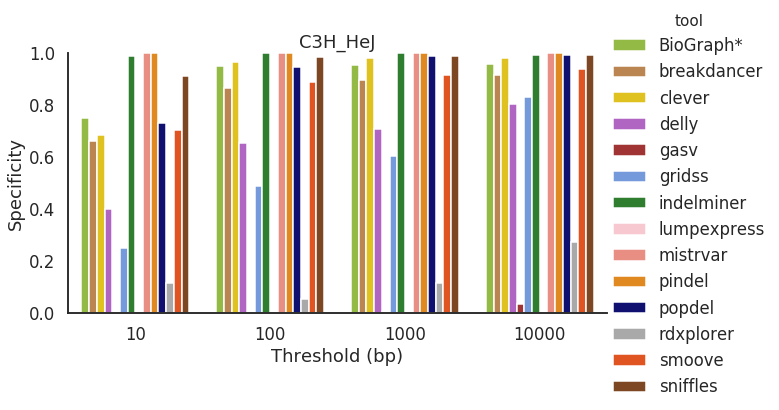

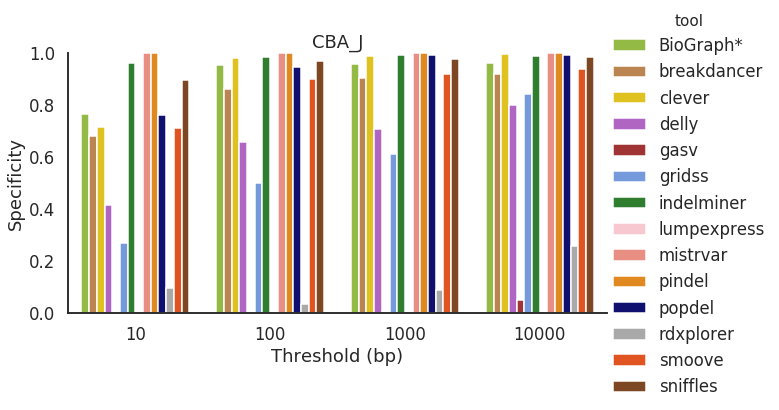

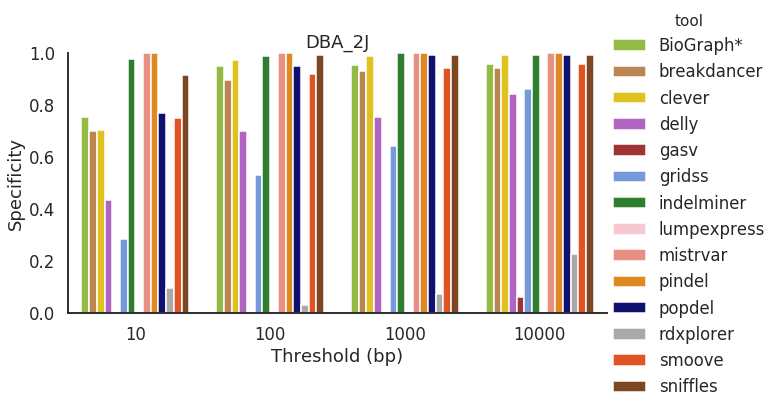

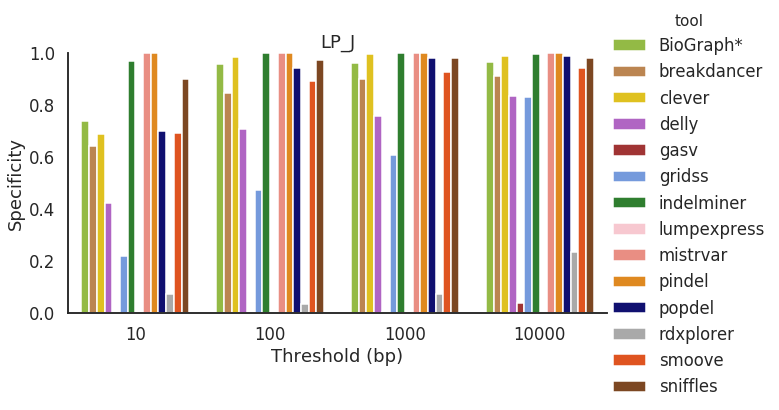

In [32]:
for s in strain:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    
    fig_order = ['BioGraph*','breakdancer','clever','delly','gasv','gridss','indelminer','lumpexpress','mistrvar','pindel','popdel','rdxplorer','smoove','sniffles']
    pal = []
    g = sns.catplot(x="threshold", y="specificity", kind="bar",data = df_1000.loc[df_1000['strain'] == s],ci=None,hue='tool',hue_order=fig_order,aspect=1.8,palette=color_map)

    plt.title(s)
    plt.ylim(0, 1)
    g.set(xlabel='Threshold (bp)', ylabel='Specificity')
    g=sns.despine()

    #plt.show(g)
    plt.savefig("../figures/supplementary/mouse/bar/specificity_th_1000_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/bar/specificity_th_1000_"+s+".pdf")

# S11 Total TP Calls x Threshold for Each Tool

In [26]:
df_sum = pd.read_csv('../analysis_files/df_sum1.csv') 
df_merge = pd.read_csv('../analysis_files/df_merged.csv')

In [27]:
tools=['breakdancer',
#'clever',
'delly',
'gasv',
'gridss',
#'indelminer',
'lumpexpress',
#'mistrvar',
#'pindel',
#'platypus',
'popdel',
'smoove',
'sniffles']

In [28]:
df_merge_100=df_merge.loc[(df_merge['threshold'] ==100)]

In [29]:
for t in tools:

    import matplotlib.pyplot as plt
    import seaborn as sns
    
    g=sns.set_style("white")
    g=sns.set_context("talk")
    g = sns.catplot(x="threshold", y="nTP", kind="point",data=df_sum.loc[(df_sum['tool'] ==t)],hue='cov',aspect=1.8)
    g.set(xlabel='Threshold (bp)', ylabel='Total number of TP calls')
    plt.title(t)
    g=sns.despine()
    #plt.show(g)
    plt.savefig("../figures/supplementary/TP_cov_"+t+".png")
    plt.savefig("../figures/supplementary/TP_cov_"+t+".pdf")

ValueError: Could not interpret input 'cov'